In [2]:
from keras.datasets import mnist
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
(
	X_train.shape,  # (60000, 28, 28)
	y_train.shape,  # (60000,)
	X_test.shape,   # (10000, 28, 28)
	y_test.shape    # (10000,)
)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5, 1.0, 'Label: 5')

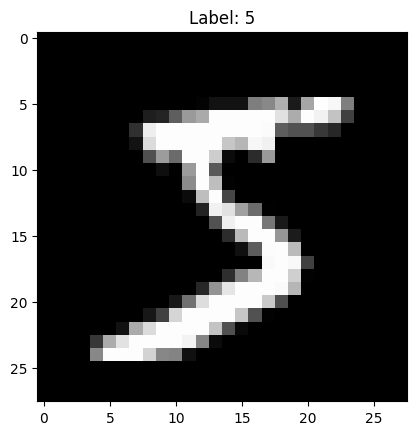

In [5]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')

In [6]:
#flatten the 28x28 images into 784-dimensional vectors
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_train_flat.shape, X_test_flat.shape

((60000, 784), (10000, 784))

In [7]:
# 28 * 28 = 784

In [8]:
# normalize the data to the range [0, 1]
X_train_flat = X_train_flat.astype('float32') / 255
X_test_flat = X_test_flat.astype('float32') / 255
X_train_flat.min(), X_train_flat.max(), X_test_flat.min(), X_test_flat.max()

(np.float32(0.0), np.float32(1.0), np.float32(0.0), np.float32(1.0))

In [9]:
from keras.utils import to_categorical
# one-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train[0]  # from 5 to [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [11]:
from keras import layers, models, optimizers, losses, metrics
import keras
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

d:\programs\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# compile the model 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# first hidden layer: 784*128 + 128 = 100480 parameters 
# second hidden layer: 128*64 + 64 = 8256 parameters
# output layer: 64*10 + 10 = 650 parameters

In [15]:
model.fit(X_train_flat, y_train, epochs=10, batch_size=32, validation_split=0.2 )
print("Training completed.")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9230 - loss: 0.2619 - val_accuracy: 0.9598 - val_loss: 0.1381
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9669 - loss: 0.1112 - val_accuracy: 0.9688 - val_loss: 0.1061
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9769 - loss: 0.0764 - val_accuracy: 0.9707 - val_loss: 0.1052
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9820 - loss: 0.0566 - val_accuracy: 0.9740 - val_loss: 0.0971
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9853 - loss: 0.0460 - val_accuracy: 0.9713 - val_loss: 0.1022
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9876 - loss: 0.0377 - val_accuracy: 0.9756 - val_loss: 0.0947
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9901 - loss: 0.0301 - val_accuracy: 0.9719 - val_loss: 0.1050
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0253 

In [16]:
# evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_flat, y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9788 - loss: 0.0817


In [17]:
history = model.fit(X_train_flat, y_train, epochs=10, batch_size=32, validation_split=0.2 )

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9944 - loss: 0.0165 - val_accuracy: 0.9750 - val_loss: 0.1198
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9946 - loss: 0.0163 - val_accuracy: 0.9772 - val_loss: 0.1145
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9743 - val_loss: 0.1160
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9780 - val_loss: 0.1158
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9956 - loss: 0.0125 - val_accuracy: 0.9737 - val_loss: 0.1354
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9961 - loss: 0.0119 - val_accuracy: 0.9740 - val_loss: 0.1367
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9967 - loss: 0.0100 - val_accuracy: 0.9772 - val_loss: 0.1376
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9963 - loss: 0.0114 - 

In [18]:
history.params # {'verbose': 1, 'epochs': 10, 'steps': 1500}

{'verbose': 'auto', 'epochs': 10, 'steps': 1500}

In [19]:
history.history.keys() # dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [21]:
import pandas as pd 
h_df = pd.DataFrame(history.history)
h_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.994354,0.016466,0.975000,0.119789
1,0.994625,0.016273,0.977250,0.114515
2,0.995354,0.014670,0.974250,0.116046
3,0.996542,0.010807,0.978000,0.115819
4,0.995646,0.012473,0.973667,0.135380


Text(0.5, 1.0, 'Training and Validation Loss')

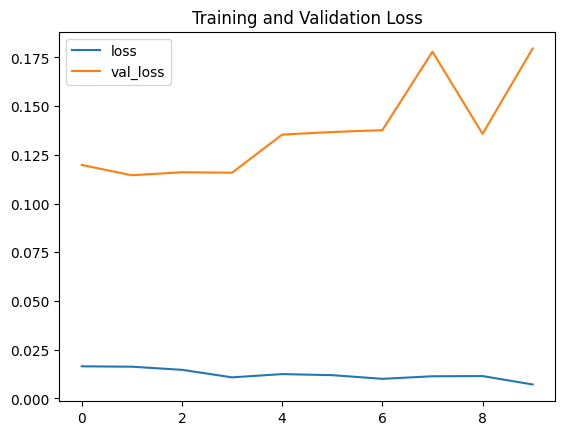

In [22]:
h_df.plot(y=['loss', 'val_loss'])
plt.title('Training and Validation Loss')

<Axes: >

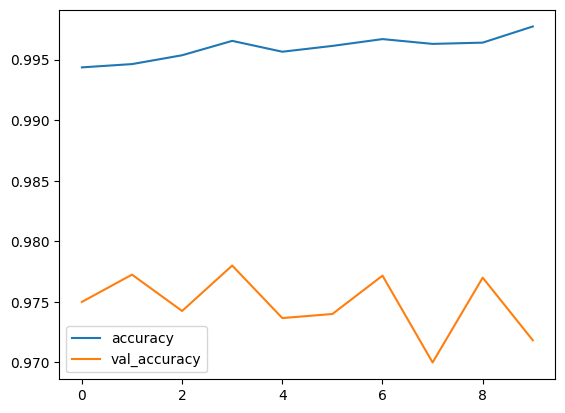

In [23]:
h_df.plot(y=['accuracy', 'val_accuracy'])

<Axes: >

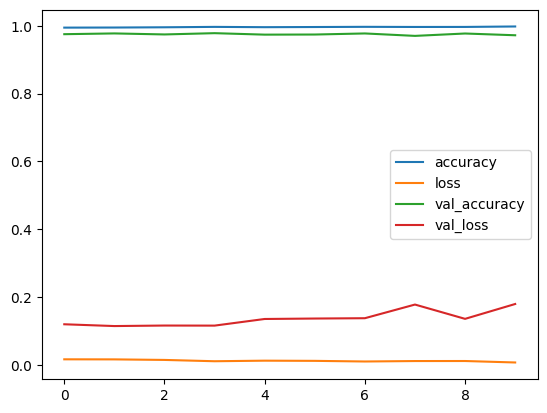

In [24]:
h_df.plot()